<a href="https://colab.research.google.com/github/avi78/Calc/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps to follow for complete project
- Import the libraries
- Load the data
- Analyze the data
- Visualize the data
- Normalisation
- Build Neural Network/Model
- Compile and Fit
- Prediction

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import datasets
from tensorflow import keras


In [3]:
(X_train, Y_train),(X_test, Y_test )= datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
training,testing=datasets.mnist.load_data()
(X_train,Y_train)=training
(X_test,Y_test)=testing

In [5]:
print("Training Image Shape",X_train.shape)

Training Image Shape (60000, 28, 28)


In [6]:
print("Testing Image Shape",X_test.shape)


Testing Image Shape (10000, 28, 28)


In [7]:
pd.DataFrame(X_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data=pd.DataFrame(X_train[0])
pd.set_option('display.max_columns',28)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, '(The image is: 5')

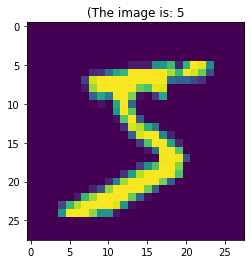

In [21]:
plt.imshow(X_train[0])
plt.title(f'(The image is: {Y_train[0]}')

In [22]:
Y_train  #label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

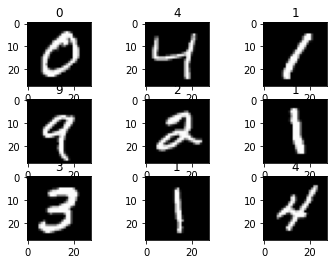

In [24]:
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.imshow(X_train[i],cmap="gray")
  plt.title(Y_train[i])

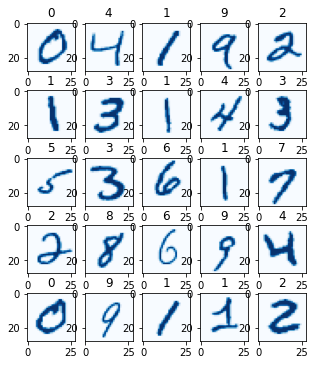

In [29]:
plt.figure(figsize=(5,6))   #increase figure size
for i in range(25):      
  plt.subplot(5,5,i+1)       # 5x5
  plt.imshow(X_train[i+1],cmap="Blues")
  plt.title(Y_train[i+1])

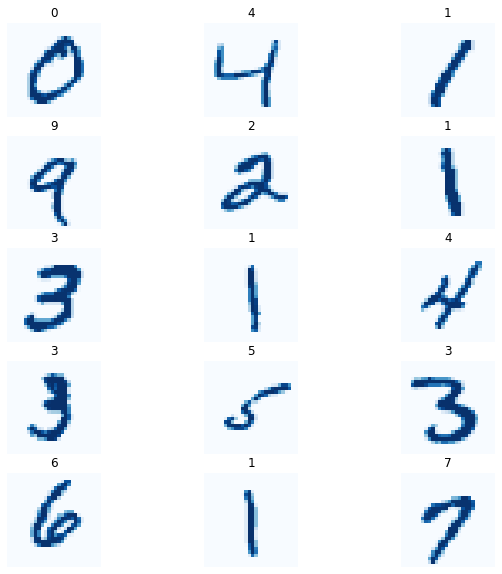

In [34]:
plt.figure(figsize=(10,10))   #increase figure size
for i in range(15):      
  plt.subplot(5,3,i+1)       
  plt.imshow(X_train[i+1],cmap="Blues")
  plt.title(Y_train[i+1])
  plt.axis("off")

In [35]:
# pixel value ranges from 0 to 255 , 0-black 255-white
# to reduce the computation time we are dividing it by 255
X_train=X_train/255.0  
X_test=X_test/255.0


In [38]:
data=pd.DataFrame(X_train[0])
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.070588,0.070588,0.070588,0.494118,0.533333,0.686275,0.101961,0.650980,1.000000,0.968627,0.498039,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.117647,0.141176,0.368627,0.603922,0.666667,0.992157,0.992157,0.992157,0.992157,0.992157,0.882353,0.674510,0.992157,0.949020,0.764706,0.250980,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.192157,0.933333,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.984314,0.364706,0.321569,0.321569,0.219608,0.152941,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.070588,0.858824,0.992157,0.992157,0.992157,0.992157,0.992157,0.776471,0.713725,0.968627,0.945098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.313725,0.611765,0.419608,0.992157,0.992157,0.803922,0.043137,0.000000,0.168627,0.603922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


#### In neural, there are layers , first layer/input layer won't be counted so there are three layers  but two counted ones and output 

In [41]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),  # input layer
    keras.layers.Dense(64,activation="relu"),     # 2 hidden layers
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")    #output layers
])

In [47]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [49]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5)  # normal times is 30 but here we used 5

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6672 - accuracy: 0.8211 - val_loss: 0.3258 - val_accuracy: 0.9050
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3100 - accuracy: 0.9109 - val_loss: 0.2661 - val_accuracy: 0.9216
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2603 - accuracy: 0.9245 - val_loss: 0.2320 - val_accuracy: 0.9331
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2254 - accuracy: 0.9352 - val_loss: 0.2011 - val_accuracy: 0.9396
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1988 - accuracy: 0.9431 - val_loss: 0.1868 - val_accuracy: 0.9457


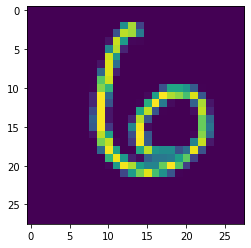

In [50]:
plt.imshow(X_test[100])

In [51]:
Y_pred= model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [52]:
Y_test[100]

6

In [53]:
np.argmax(Y_pred[100])

6